In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.funs import count_outliers
from utils.symmetry_scores import get_scores_full

from transformers import BeitForImageClassification, BeitForMaskedImageModeling

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir = '../../../../_data/fig-symmetry-vision-transformers/full-models/BEiT-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [3]:
path = ["beit.encoder.layer[", "].attention.attention.query.weight", "].attention.attention.key.weight"]

'BEiT base (l = 12, d = 768, h = 12, patch = 16 ; 860M parameters)'
dh = 64
patch = 16
l = 12
d = 768
h = d // dh
model = BeitForImageClassification.from_pretrained('microsoft/beit-base-patch16-224')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['BEiTbase-16-224'] = [l, d, h, dh, sym_scores]

'BEiT base (l = 12, d = 768, h = 12, patch = 16 ; 307M parameters)'
dh = 64
patch = 16
l = 24
d = 1024
h = d // dh
model = BeitForImageClassification.from_pretrained('microsoft/beit-large-patch16-224')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['BEiTlarge-16-224'] = [l, d, h, dh, sym_scores]

'BEiT base (l = 12, d = 768, h = 12, patch = 16 ; 860M parameters)'
dh = 64
patch = 16
l = 12
d = 768
h = d // dh
model = BeitForImageClassification.from_pretrained('microsoft/beit-base-patch16-384')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['BEiTbase-16-384'] = [l, d, h, dh, sym_scores]

'BEiT large (l = 24, d = 1024, h = 16, patch = 16 ; 307M parameters)'
dh = 64
patch = 16
l = 24
d = 1024
h = d // dh
model = BeitForImageClassification.from_pretrained('microsoft/beit-large-patch16-384')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['BEiTlarge-16-384'] = [l, d, h, dh, sym_scores]

'BEiT base (l = 12, d = 768, h = 12, patch = 16 ; 860M parameters)'
dh = 64
patch = 16
l = 12
d = 768
h = d // dh
model = BeitForImageClassification.from_pretrained('microsoft/beit-base-patch16-224-pt22k')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['BEiTbase-16-224-pt22k'] = [l, d, h, dh, sym_scores]

'BEiT large (l = 24, d = 1024, h = 16, patch = 16 ; 307M parameters)'
dh = 64
patch = 16
l = 24
d = 1024
h = d // dh
model = BeitForMaskedImageModeling.from_pretrained('microsoft/beit-large-patch16-224-pt22k')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['BEiTlarge-16-224-pt22k'] = [l, d, h, dh, sym_scores]

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of BeitForImageClassification were not initialized from the model checkpoint at microsoft/beit-base-patch16-224-pt22k and are newly initialized: ['beit.pooler.layernorm.bias', 'beit.pooler.layernorm.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

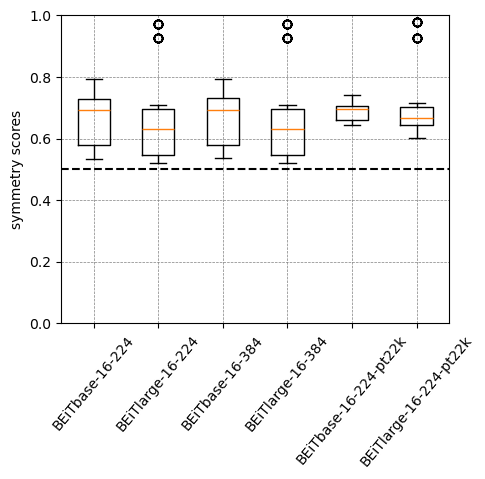

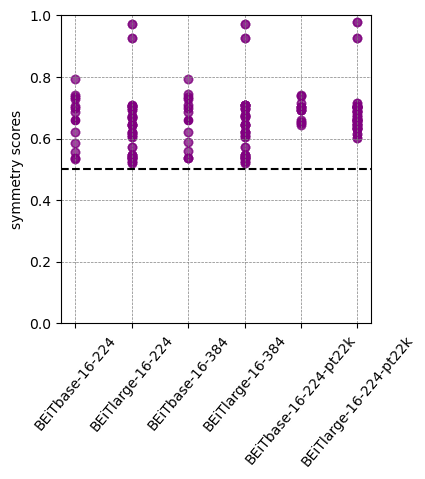

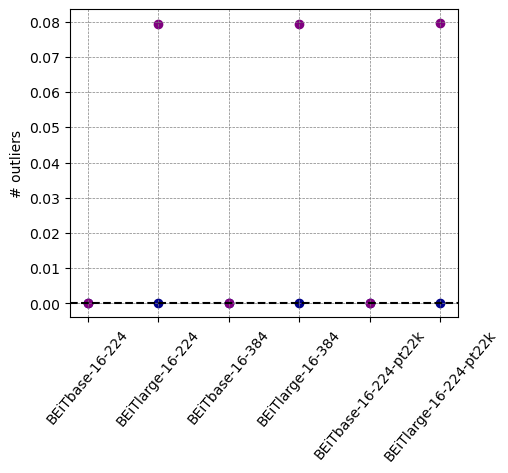

In [4]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)